<a href="https://colab.research.google.com/github/sh1var3ddy/CNN/blob/main/ResNet_on_Tb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import shutil

import numpy as np
from keras.preprocessing import image

In [ ]:
# def make_dirs_for_data():

#   ! pip install -q kaggle
#   from google.colab import files
#   files.upload()
#   ! mkdir ~/.kaggle
#   ! cp kaggle.json ~/.kaggle/
#   ! chmod 600 ~/.kaggle/kaggle.json


#   !kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

#   import zipfile
#   zf = "/content/tuberculosis-tb-chest-xray-dataset.zip"
#   target_dir = "/content/dataset/cnn/chest-xray"
#   zfile = zipfile.ZipFile(zf)
#   zfile.extractall(target_dir)

#   path='/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis'
#   os.listdir(path)[1]

#   par_dir="/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database"
#   path = par_dir+'/test'
#   os.mkdir(path)

#   path = par_dir+'/validation'
#   os.mkdir(path)

#   path = par_dir+'/train'
#   os.mkdir(path)

#   path_of_train = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train"

#   path_of_train_normal = path_of_train+'/Normal'

#   path_of_train_Tb = path_of_train+'/Tb'

#   os.mkdir(path_of_train_normal)

#   os.mkdir(path_of_train_Tb)

#   path_of_test = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test"

#   path_of_test_normal = path_of_test+'/Normal'

#   path_of_test_Tb = path_of_test+'/Tb'

#   os.mkdir(path_of_test_normal)

#   os.mkdir(path_of_test_Tb)

#   path_of_val = "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation"

#   path_of_val_normal = path_of_val+'/Normal'

#   path_of_val_Tb = path_of_val+'/Tb'

#   os.mkdir(path_of_val_normal)

#   os.mkdir(path_of_val_Tb)
  
#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Normal/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
    
#   allfiles = os.listdir(source)
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)

#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/Tuberculosis/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
    
#   allfiles = os.listdir(source)
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)

#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal/'

#   allfiles = os.listdir(source)

#   np.random.shuffle(allfiles)

#   allfiles = allfiles[:50]
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)

#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Normal/'

#   allfiles = os.listdir(source)

#   np.random.shuffle(allfiles)

#   allfiles = allfiles[:50]
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)

#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Tb/'

#   allfiles = os.listdir(source)

#   np.random.shuffle(allfiles)

#   allfiles = allfiles[:50]
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)

#   source = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb/'
#   destination = '/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb/'

#   allfiles = os.listdir(source)

#   np.random.shuffle(allfiles)

#   allfiles = allfiles[:50]
    
#   for f in allfiles:
#     shutil.move(source + f, destination + f)
  
#   print("test-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal')))
#   print("val-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Normal')))
#   print("train-normal",len(os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Normal")))

#   print("test-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb')))
#   print("val-normal",len(os.listdir('/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/Tb')))
#   print("train-normal",len(os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/Tb")))

In [ ]:
make_dirs_for_data()

Saving kaggle.json to kaggle.json
 98% 652M/663M [00:04<00:00, 164MB/s]
100% 663M/663M [00:04<00:00, 158MB/s]
test-normal 50
val-normal 50
train-normal 3400
test-normal 50
val-normal 50
train-normal 600


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
               input_shape=(128, 128, 3)),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),        
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),    
        MaxPooling2D(pool_size=(2, 2)),   
        Dropout(0.25),
        
        Flatten(),
        
        Dense(1024, activation='relu'),
        
        Dense(512, activation='relu'),
        
        Dense(1,activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
    )


val_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/train/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = val_gen.flow_from_directory(
    "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/validation/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 4000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_generator.image_shape

(128, 128, 3)

In [ ]:
train_generator.class_indices

{'Normal': 0, 'Tb': 1}

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 10,
    validation_data = val_generator,
    validation_steps=2,
    callbacks=my_callbacks
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 6.7587 - accuracy: 0.7344 
Epoch 00001: val_loss improved from inf to 41.32990, saving model to model.01-41.33.h5
10/10 [==============================] - 123s 12s/step - loss: 6.7587 - accuracy: 0.7344 - val_loss: 41.3299 - val_accuracy: 0.5781
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 3.5281 - accuracy: 0.7844 
Epoch 00002: val_loss improved from 41.32990 to 6.03128, saving model to model.02-6.03.h5
10/10 [==============================] - 122s 12s/step - loss: 3.5281 - accuracy: 0.7844 - val_loss: 6.0313 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 1.0758 - accuracy: 0.8687 
Epoch 00003: val_loss improved from 6.03128 to 0.76925, saving model to model.03-0.77.h5
10/10 [==============================] - 125s 13s/step - loss: 1.0758 - accuracy: 0.8687 - val_loss: 0.7693 - val_accuracy: 0.7656
Epoch 4/10
10/10 [==============================] - ETA

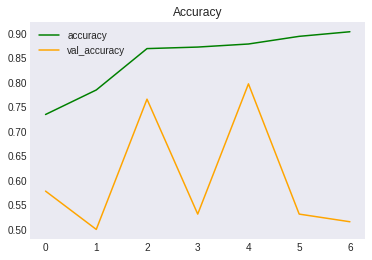

In [ ]:
plt.style.use("seaborn-dark")
plt.title("Accuracy")
plt.plot(hist_new.history['accuracy'],label="accuracy",c='green')
plt.plot(hist_new.history['val_accuracy'],label="val_accuracy",c='orange')
plt.legend()
plt.show()

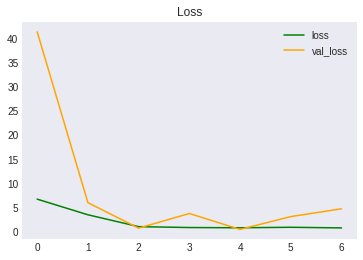

In [ ]:
plt.style.use("seaborn-dark")
plt.title("Loss")
plt.plot(hist_new.history['loss'],label="loss",c='green')
plt.plot(hist_new.history['val_loss'],label="val_loss",c='orange')
plt.legend()
plt.show()

In [ ]:
import keras
model = keras.models.load_model(filepath='/content/model.05-0.50.h5')

In [ ]:
model.evaluate_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.46487781405448914, 0.8100000023841858]

In [ ]:
test_gen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_gen.flow_from_directory(
    "/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/",
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 100 images belonging to 2 classes.


In [ ]:
result = model.evaluate(test_generator)

4/4 [==============================] - 10s 2s/step - loss: 0.7793 - accuracy: 0.7700


In [ ]:
y_actual, y_test = [],[]

In [ ]:
for i in os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb/"):
    img=image.load_img("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Tb/"+i,target_size=(128,128))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [ ]:
for i in os.listdir("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal/"):
    img=image.load_img("/content/dataset/cnn/chest-xray/TB_Chest_Radiography_Database/test/Normal/"+i,target_size=(128,128))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

y_actual = y_actual.astype(int)
y_test = y_test.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

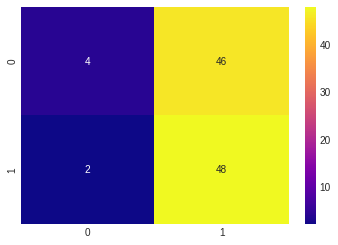

In [ ]:
sns.heatmap(cn,cmap="plasma",annot=True)